In [1]:
import numpy as np
import datetime as dt
import seaborn as sns
import pandas as pd
import lightgbm as lgb
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
df=pd.read_csv('dataset.csv')
len(df)*0.15

657.0

In [3]:
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season',  'VVM10', 'TM', 'Week_day'])
    df = df.astype(float)

    return df

def get_feature_importance_percentage(model):
    feature_importance = model.feature_importances_
    total_importance = feature_importance.sum()
    feature_importance_percentage = (feature_importance / total_importance) * 100
    return feature_importance_percentage

def light_model():
    df=pd.read_csv('dataset.csv')
    df = encoder(df[['Holiday','Time_Segment', 'VVM10', 'Season', 'TM', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    
    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier(learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=31)

    # Initialize GridSearchCV
   
    # Fit GridSearchCV
    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Calculate accuracy

    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    lgb.plot_importance(model)
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    sensitivity = tpr[np.argmax(tpr - fpr)]
    specificity = 1 - fpr[np.argmax(tpr - fpr)]
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    
    # Get feature importance in percentage
    feature_importance_percentage = get_feature_importance_percentage(model)
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_percentage, y=X.columns)
    plt.xlabel('Feature Importance (%)')
    plt.ylabel('Features')
    plt.show()
    
    df1=pd.read_csv('final_dataset.csv')
    
    df_2=df1[['Holiday','Time_Segment', 'VVM10', 'Season', 'TM', 'Week_day', 'Vacation_week', 'Exceeds Threshold']][3723:]
    df_2['Prediction']=y_pred.astype(int)
    df_2.to_csv('final_dataset_prediction_testdata.csv', index=False)
    
    df3=X_test
    df3['y_test']=y_test.astype(int)
    df3['y_pred']=y_pred.astype(int)
    df3.to_csv('prob.csv', index=False)
    
    df_f=df1[['Day','Holiday','Time_Segment', 'VVM10', 'Season', 'TM', 'Week_day', 'Vacation_week', 'Exceeds Threshold']][4014:4056]
    df_f['Prediction']=y_pred[291:333].astype(int)

    accuracy_f = accuracy_score(y_test[291:333], y_pred[291:333])
    print("Accuracy final:", accuracy_f)

    print(df_f.to_string(index=False))
    df_f.to_csv('tabla_finalsitu4.csv', index=False)
    return df_f
    
def main():
    light_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


[LightGBM] [Info] Number of positive: 1765, number of negative: 1958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474080 -> initscore=-0.103773
[LightGBM] [Info] Start training from score -0.103773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

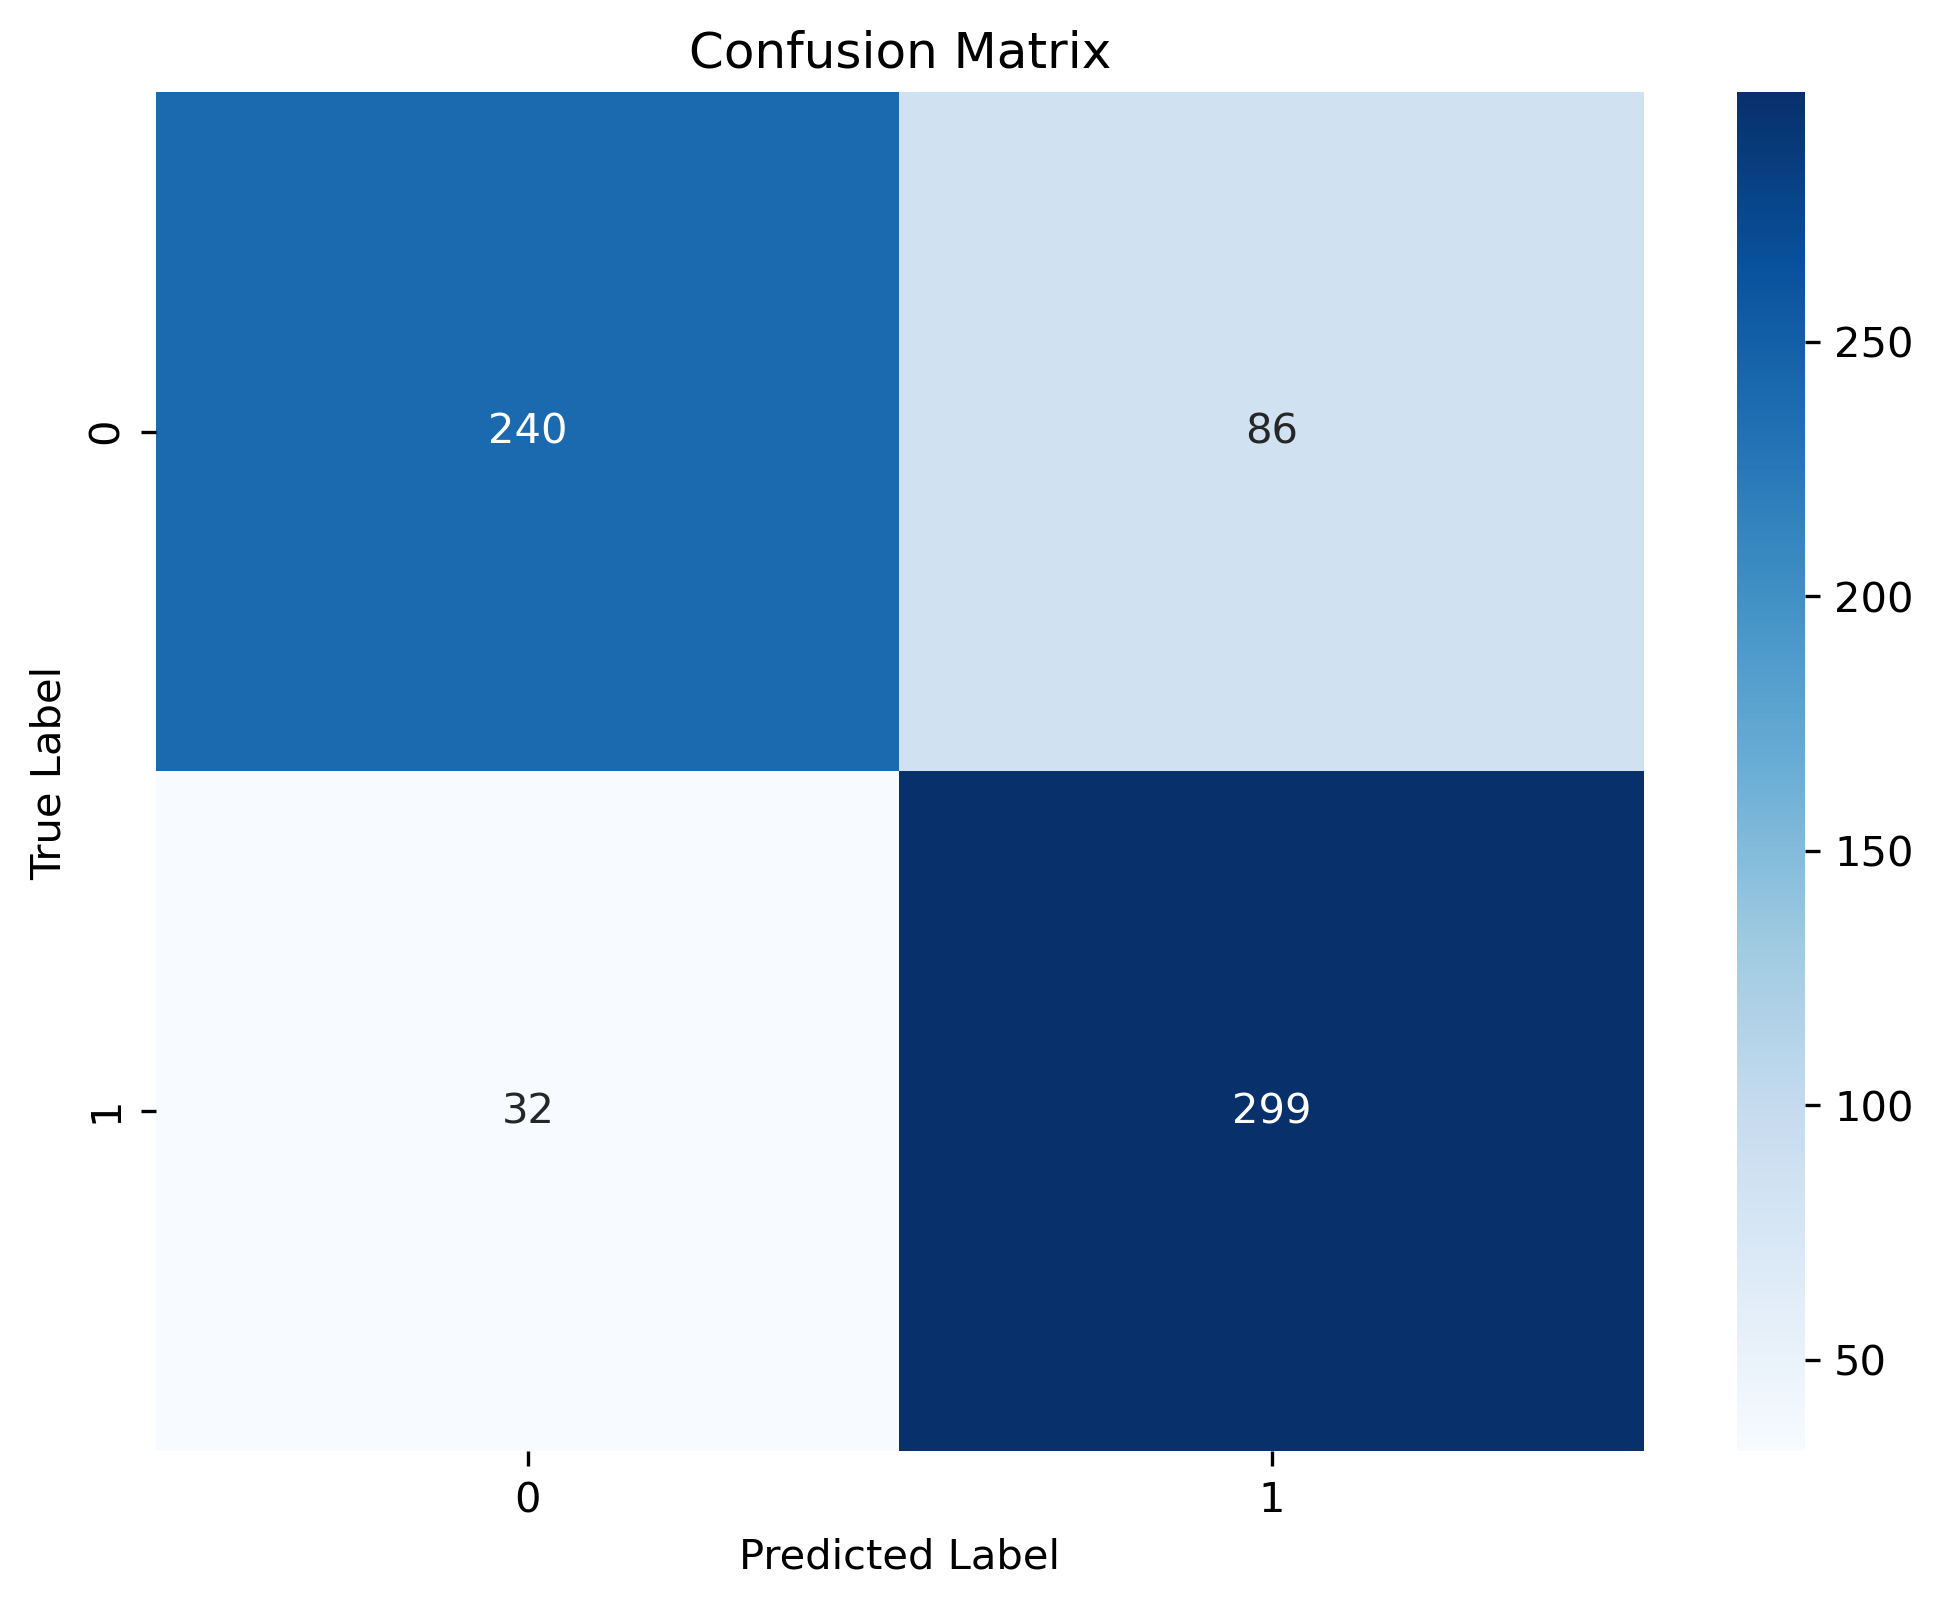

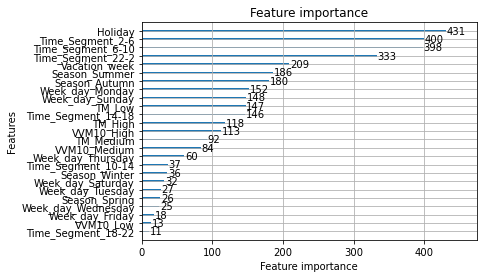

Sensitivity: 0.9033232628398792
Specificity: 0.7361963190184049


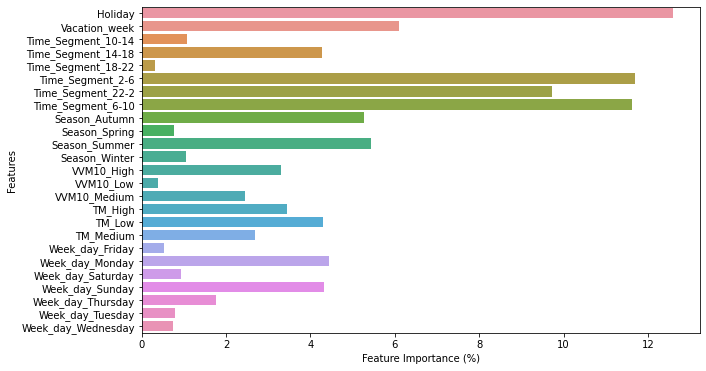

Accuracy final: 0.8571428571428571
       Day Holiday Time_Segment  VVM10 Season     TM  Week_day  Vacation_week  Exceeds Threshold  Prediction
2022-11-01      No          2-6 Medium Autumn Medium   Tuesday              1                  0           0
2022-11-01      No         6-10 Medium Autumn Medium   Tuesday              1                  0           1
2022-11-01      No        10-14 Medium Autumn Medium   Tuesday              1                  1           1
2022-11-01      No        14-18 Medium Autumn Medium   Tuesday              1                  0           1
2022-11-01      No        18-22 Medium Autumn Medium   Tuesday              1                  0           1
2022-11-01      No         22-2 Medium Autumn Medium   Tuesday              1                  0           0
2022-11-02      No          2-6 Medium Autumn Medium Wednesday              1                  0           0
2022-11-02      No         6-10 Medium Autumn Medium Wednesday              1                

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [4]:
main()

In [7]:
df = pd.read_csv('tabla_finalsitu4.csv')

In [8]:
df

,Day,Holiday,Time_Segment,VVM10,Season,TM,Week_day,Vacation_week,Exceeds Threshold,Prediction
0,2022-11-01,No,2-6,Medium,Autumn,Medium,Tuesday,1,0,0
1,2022-11-01,No,6-10,Medium,Autumn,Medium,Tuesday,1,0,1
2,2022-11-01,No,10-14,Medium,Autumn,Medium,Tuesday,1,1,1
3,2022-11-01,No,14-18,Medium,Autumn,Medium,Tuesday,1,0,1
4,2022-11-01,No,18-22,Medium,Autumn,Medium,Tuesday,1,0,1
5,2022-11-01,No,22-2,Medium,Autumn,Medium,Tuesday,1,0,0
6,2022-11-02,No,2-6,Medium,Autumn,Medium,Wednesday,1,0,0
7,2022-11-02,No,6-10,Medium,Autumn,Medium,Wednesday,1,0,1
8,2022-11-02,No,10-14,Medium,Autumn,Medium,Wednesday,1,1,1
9,2022-11-02,No,14-18,Medium,Autumn,Medium,Wednesday,1,1,1
